In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from func_preprocesamiento import preprocesar

#### NO correr esto, vuelve a procesar datasets

In [2]:
dev_df = pd.read_csv('../Dataset/raw/dev.csv')
bins = pd.qcut(dev_df['precio_pesos_constantes'], q=5, labels=False)  # 4 cuartiles
train_dataset, val_dataset = train_test_split(dev_df, train_size=0.8, random_state=42, stratify=bins)

/tmp/ipykernel_20944/1655610193.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_df = pd.read_csv('../Dataset/raw/dev.csv')


In [3]:
train_procesado = preprocesar(train_dataset)
direccion = '../Dataset/Procesado/train_procesado.csv'
train_procesado.to_csv(direccion, index=False)
train_procesado_categorico = pd.read_csv(direccion)

Columna a predecir: Laundry
Columna a predecir: Calefaccion
Columna a predecir: Jacuzzi
Columna a predecir: Gimnasio
Columna a predecir: Cisterna
Columna a predecir: AireAC
Columna a predecir: SalonFiestas
Columna a predecir: Amoblado
Columna a predecir: Antiguedad


In [4]:
df_val = preprocesar(val_dataset)
direccion = '../Dataset/Procesado/val_procesado.csv'
df_val.to_csv(direccion, index=False)
val_procesado_categorico = pd.read_csv(direccion)

Columna a predecir: Laundry
Columna a predecir: Calefaccion
Columna a predecir: Jacuzzi
Columna a predecir: Gimnasio
Columna a predecir: Cisterna
Columna a predecir: AireAC
Columna a predecir: SalonFiestas
Columna a predecir: Amoblado
Columna a predecir: Antiguedad


## DATASET NUMERICO

In [5]:
#ARMAMOS EL DATASET NUMERICO SACANDO LAS COLUMNAS CATEGORICAS
direccion = '../Dataset/Procesado/train_procesado.csv'
train_procesado = pd.read_csv(direccion)

direccion = '../Dataset/Procesado/val_procesado.csv'
val_procesado = pd.read_csv(direccion)

### NUEVO

In [6]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


direccion = '../Dataset/Procesado/train_procesado.csv'
train_procesado = pd.read_csv(direccion)
# Seleccionar las características a usar
X = train_procesado[['Cocheras', 'precio_pesos_constantes']]


# Configurar y entrenar el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.005, random_state=5)  # Ajusta contamination según tu criterio
iso_forest.fit(X)

# Predecir los outliers
train_procesado['anomaly_score'] = iso_forest.predict(X)

# Identificar outliers
outliers = train_procesado[train_procesado['anomaly_score'] == -1]


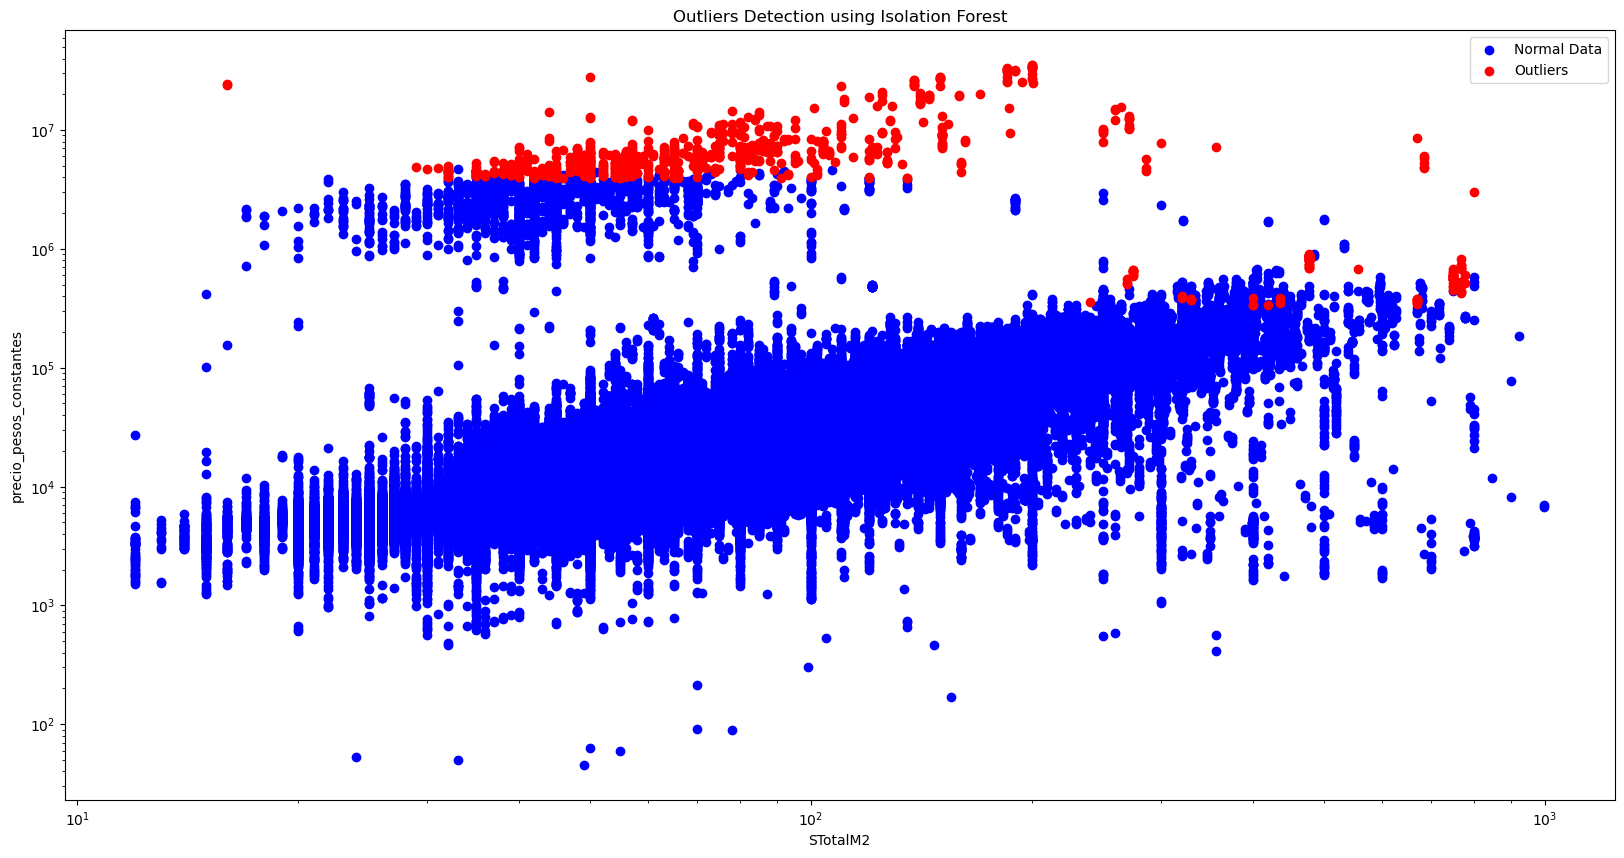

Cantidad de outliers: 871
Estos son los datos de los outliers:
        STotalM2  Antiguedad  Ambientes  precio_pesos_constantes
51          50.0           0          3             4.814576e+06
59          57.0           0          2             6.565331e+06
176        185.0           0          3             3.156169e+07
257         65.0           0          3             5.973854e+06
278        145.0           0          4             1.991285e+07
...          ...         ...        ...                      ...
174478      57.0           0          2             7.611132e+06
174518     750.0           2          5             5.809332e+05
174680      55.0           0          3             4.008713e+06
174759     127.0           0          3             5.384207e+06
175430      70.0           0          3             5.752600e+06

[871 rows x 4 columns]
        STotalM2  Antiguedad  Ambientes  precio_pesos_constantes
47055      200.0          30          4             3.518759e+07
172

In [7]:
plt.figure(figsize=(20, 10))

# Graficar los puntos normales
plt.scatter(train_procesado[train_procesado['anomaly_score'] == 1]['STotalM2'], 
            train_procesado[train_procesado['anomaly_score'] == 1]['precio_pesos_constantes'], 
            color='blue', label='Normal Data')

# Graficar los outliers
plt.scatter(outliers['STotalM2'], outliers['precio_pesos_constantes'], 
            color='red', label='Outliers')

# Agregar etiquetas y leyenda
plt.xlabel('STotalM2')
plt.ylabel('precio_pesos_constantes')
plt.title('Outliers Detection using Isolation Forest')
plt.legend()

# Establecer escala logarítmica
plt.xscale('log')
plt.yscale('log')

plt.show()

print('Cantidad de outliers:', outliers.shape[0])
print('Estos son los datos de los outliers:')
print(outliers[['STotalM2', 'Antiguedad', 'Ambientes', 'precio_pesos_constantes']])


top_10_max_price = train_procesado.nlargest(10, 'precio_pesos_constantes')

# Mostrar los metros cuadrados y el precio de estos registros
print(top_10_max_price[['STotalM2', 'Antiguedad', 'Ambientes', 'precio_pesos_constantes']])

Cantidad de clusters: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 

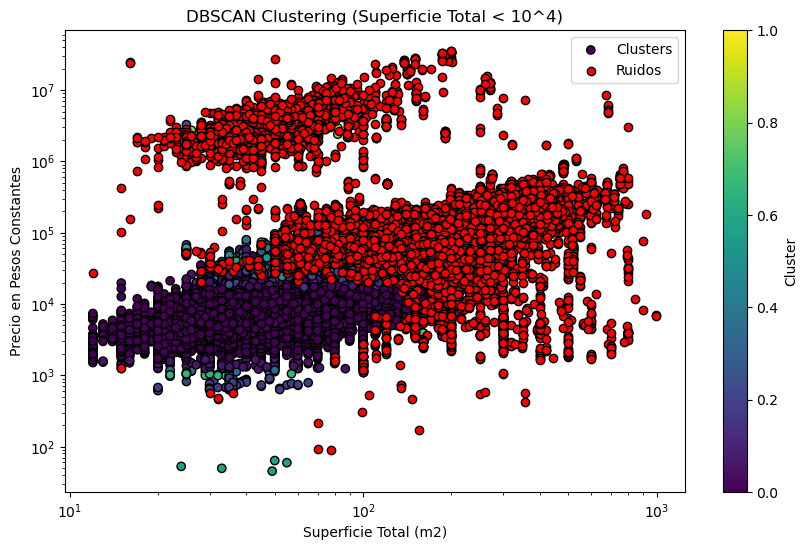

In [8]:
from sklearn.cluster import DBSCAN

# Parámetros óptimos
eps = 30  # Ajusta este valor según el gráfico de k-distancias
min_samples = 5
X = train_procesado[['STotalM2', 'precio_pesos_constantes']]

# Ejecutar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)
print('Cantidad de clusters:', np.unique(labels))
# Agregar etiquetas de cluster a los datos
train_procesado['cluster'] = labels


# Graficar los datos filtrados
plt.figure(figsize=(10, 6))

# Graficar los puntos normales
plt.scatter(train_procesado[train_procesado['cluster'] != -1]['STotalM2'], 
            train_procesado[train_procesado['cluster'] != -1]['precio_pesos_constantes'], 
            c=train_procesado[train_procesado['cluster'] != -1]['cluster'], cmap='viridis', marker='o', edgecolor='k', label='Clusters')

# Graficar los ruidos
plt.scatter(train_procesado[train_procesado['cluster'] == -1]['STotalM2'], 
            train_procesado[train_procesado['cluster'] == -1]['precio_pesos_constantes'], 
            color='red', marker='o', edgecolor='k', label='Ruidos')

plt.xlabel('Superficie Total (m2)')
plt.ylabel('Precio en Pesos Constantes')
plt.title('DBSCAN Clustering (Superficie Total < 10^4)')
plt.colorbar(label='Cluster')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


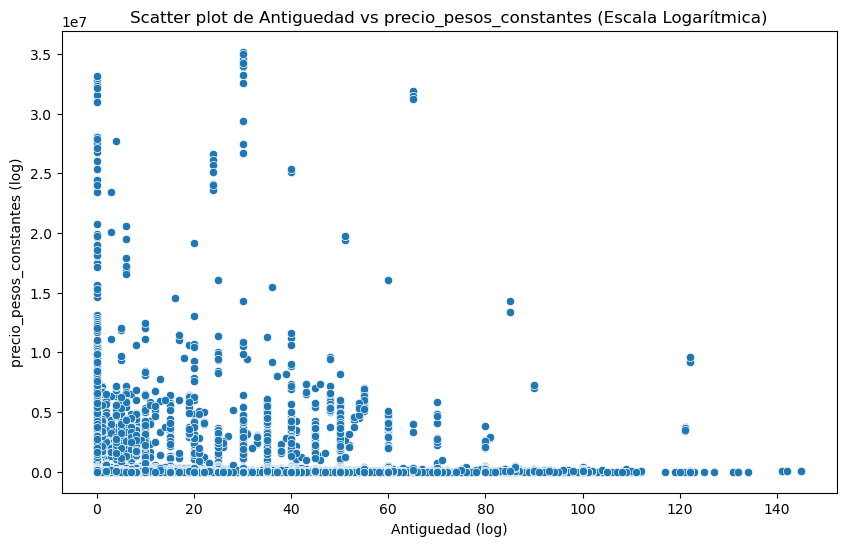

In [9]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['Antiguedad'], y=train_procesado['precio_pesos_constantes'])
plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Antiguedad (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

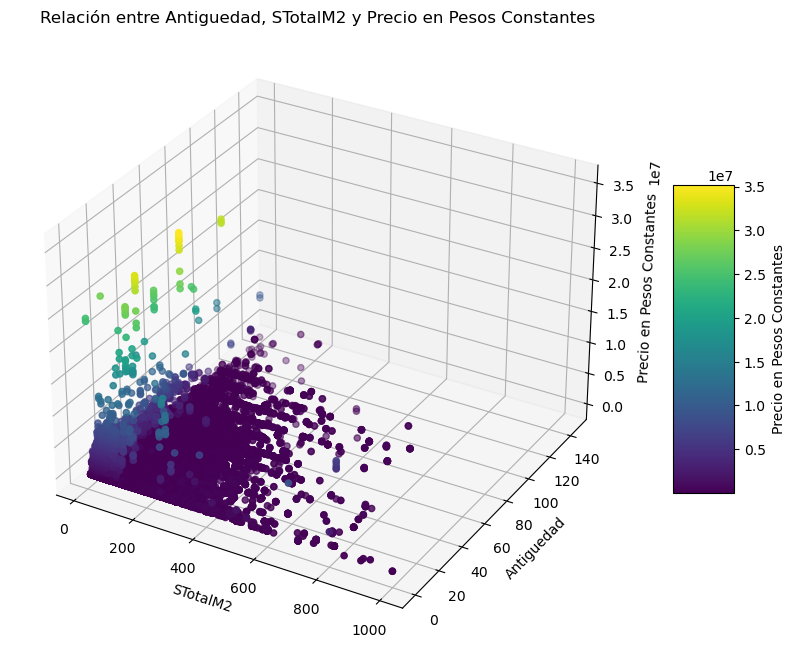

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Normalizar la columna 'precio_pesos_constantes'
train_procesado['precio_pesos_constantes_normalizado'] = scaler.fit_transform(train_procesado[['precio_pesos_constantes']])

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos con colores según el precio en pesos constantes
sc = ax.scatter(train_procesado['STotalM2'],
                train_procesado['Antiguedad'],  
                train_procesado['precio_pesos_constantes'], 
                c=train_procesado['precio_pesos_constantes'], 
                cmap='viridis', 
                marker='o')

# Etiquetas de los ejes
ax.set_ylabel('Antiguedad')
ax.set_xlabel('STotalM2')
ax.set_zlabel('Precio en Pesos Constantes')

# Título del gráfico
ax.set_title('Relación entre Antiguedad, STotalM2 y Precio en Pesos Constantes')

# Añadir barra de color
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Precio en Pesos Constantes')

# Mostrar el gráfico
plt.show()

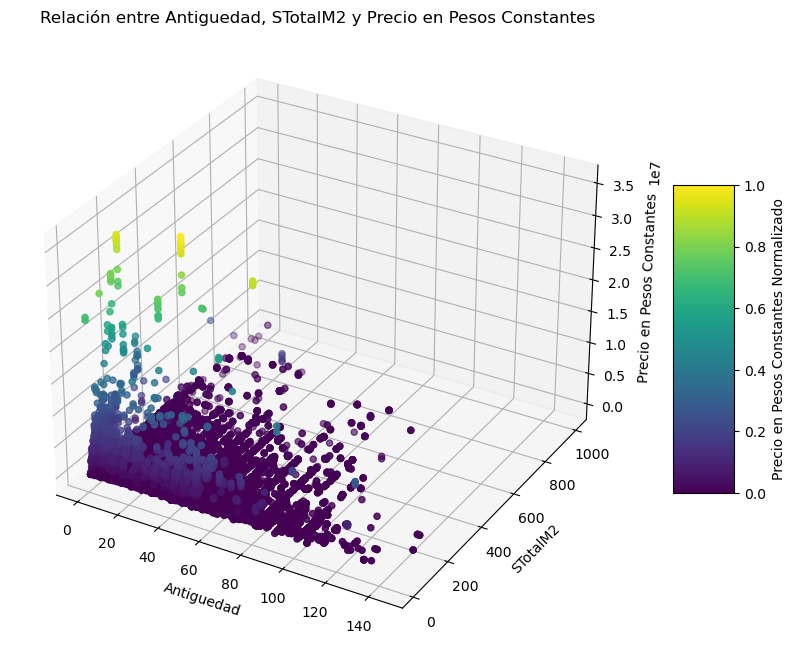

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Normalizar la columna 'precio_pesos_constantes'
train_procesado['precio_pesos_constantes_normalizado'] = scaler.fit_transform(train_procesado[['precio_pesos_constantes']])
# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos con colores según el precio en pesos constantes normalizado
sc = ax.scatter(train_procesado['Antiguedad'], 
                train_procesado['STotalM2'], 
                train_procesado['precio_pesos_constantes'], 
                c=train_procesado['precio_pesos_constantes_normalizado'], 
                cmap='viridis', 
                marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Antiguedad')
ax.set_ylabel('STotalM2')
ax.set_zlabel('Precio en Pesos Constantes')

# Título del gráfico
ax.set_title('Relación entre Antiguedad, STotalM2 y Precio en Pesos Constantes')

# Añadir barra de color
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Precio en Pesos Constantes Normalizado')

# Mostrar el gráfico
plt.show()

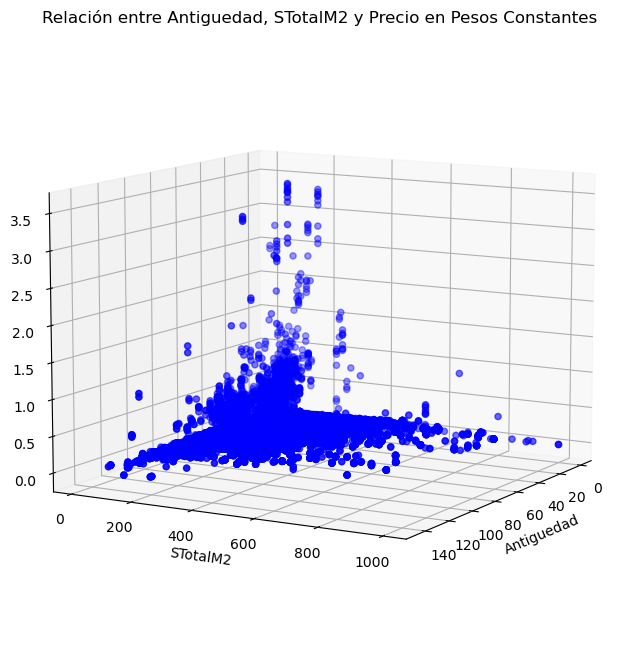

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax.scatter(train_procesado['Antiguedad'], train_procesado['STotalM2'], train_procesado['precio_pesos_constantes'], c='b', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Antiguedad')
ax.set_ylabel('STotalM2')
ax.set_zlabel('Precio en Pesos Constantes')

# Título del gráfico
ax.set_title('Relación entre Antiguedad, STotalM2 y Precio en Pesos Constantes')

# Mostrar el gráfico desde distintos ángulos
angles = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
for angle in angles:
    ax.view_init(elev=10, azim=angle)
    plt.draw()
    plt.pause(0.5)  # Pausa para visualizar cada ángulo

plt.show()

/tmp/ipykernel_20944/223918179.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot1.figure.colorbar(sm1, label='Precio en Pesos Constantes')


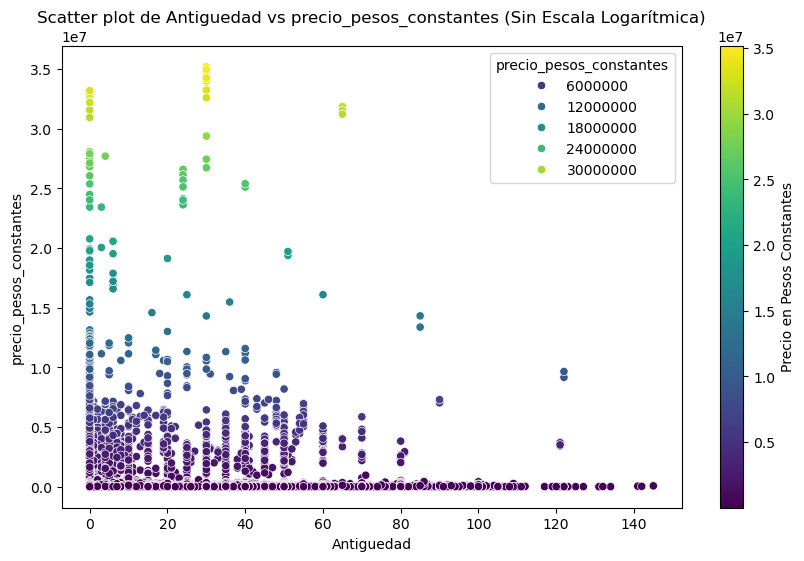

/tmp/ipykernel_20944/223918179.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot2.figure.colorbar(sm2, label='Precio en Pesos Constantes')


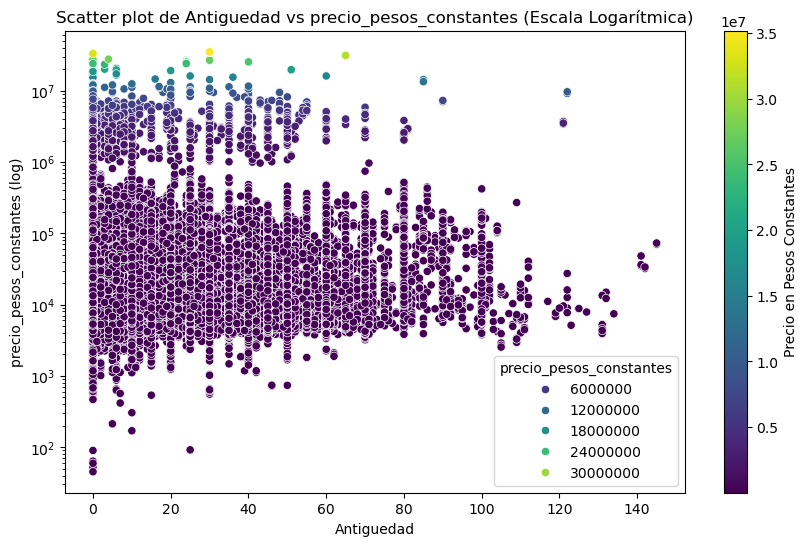

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el primer scatter plot sin escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot1 = sns.scatterplot(x=train_procesado['Antiguedad'], 
                                y=train_procesado['precio_pesos_constantes'], 
                                hue=train_procesado['precio_pesos_constantes'], 
                                palette='viridis')

plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Sin Escala Logarítmica)')
plt.xlabel('Antiguedad')
plt.ylabel('precio_pesos_constantes')

# Añadir barra de color
norm1 = plt.Normalize(train_procesado['precio_pesos_constantes'].min(), train_procesado['precio_pesos_constantes'].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
scatter_plot1.figure.colorbar(sm1, label='Precio en Pesos Constantes')

plt.show()

# Crear el segundo scatter plot con escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot2 = sns.scatterplot(x=train_procesado['Antiguedad'], 
                                y=train_procesado['precio_pesos_constantes'], 
                                hue=train_procesado['precio_pesos_constantes'], 
                                palette='viridis')

plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Antiguedad')
plt.ylabel('precio_pesos_constantes (log)')
plt.yscale('log')

# Añadir barra de color
norm2 = plt.Normalize(train_procesado['precio_pesos_constantes'].min(), train_procesado['precio_pesos_constantes'].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
scatter_plot2.figure.colorbar(sm2, label='Precio en Pesos Constantes')

plt.show()

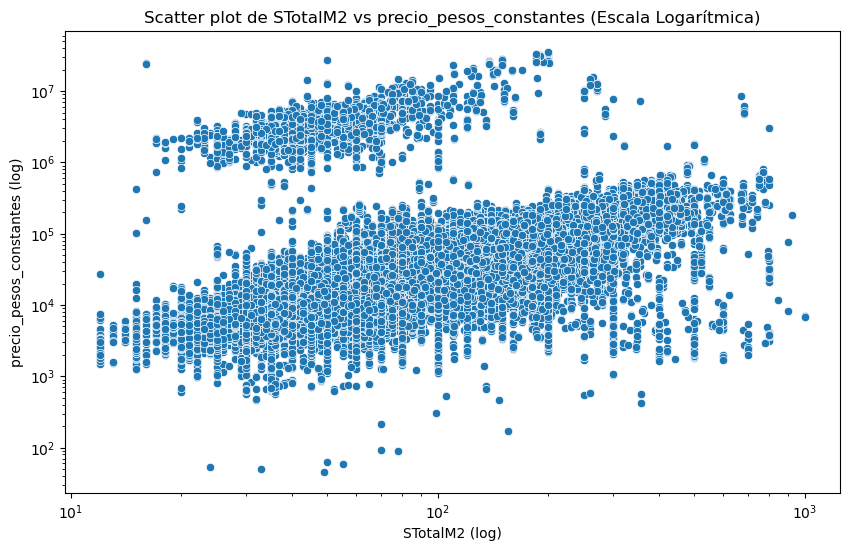

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['STotalM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de STotalM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('STotalM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

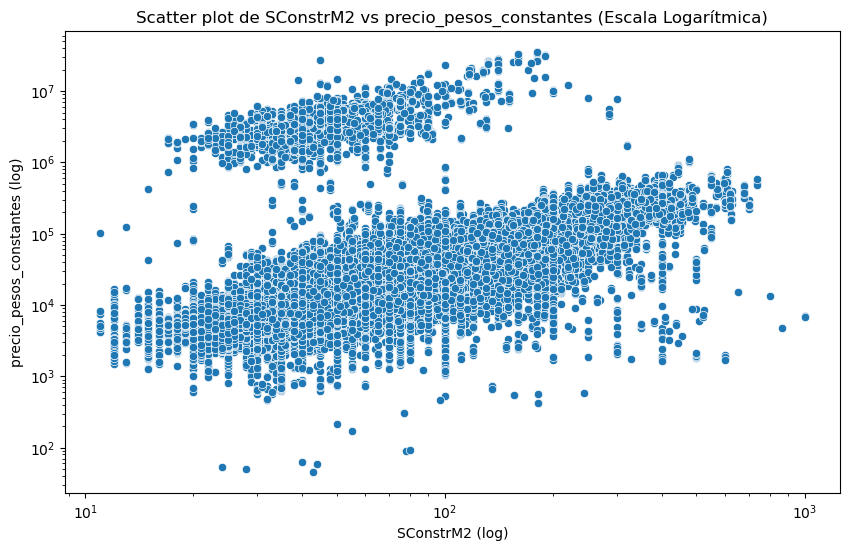

In [13]:
# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['SConstrM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de SConstrM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('SConstrM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

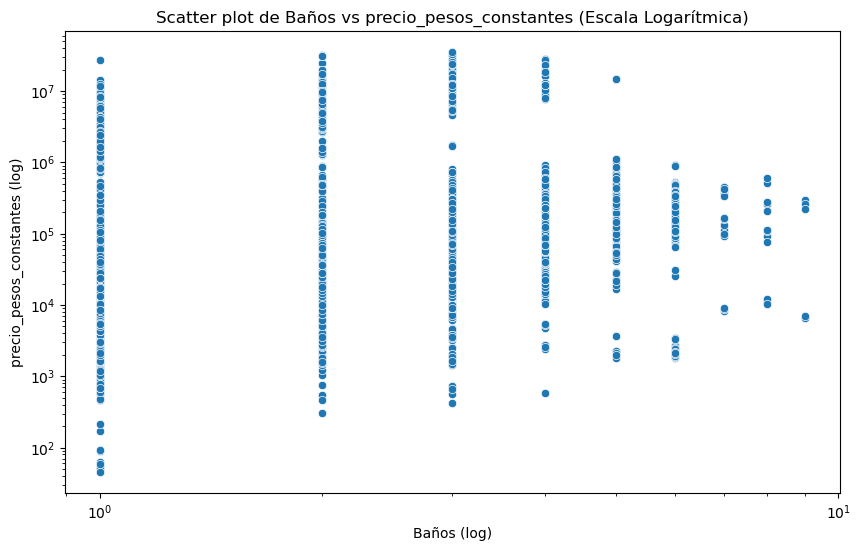

In [14]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['Banos'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de Baños vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Baños (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()